In [1]:
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics

from pandas.api.types import is_numeric_dtype

In [2]:
fifa_20_players = pd.read_csv("players_20.csv")

# Odstránenie a nahradenie NaN hodnôt pre jednotlivé atribúty
Zistile sme, že niektorí hráči majú prázdne niektoré atribúty. Môže to byť spôsobené postom, na ktorom hrajú, alebo nehrajú v národnom tíme a pod.

In [3]:
fifa_20_players['gk_diving'] = fifa_20_players['gk_diving'].replace(np.nan, 0.0)
fifa_20_players['gk_handling'] = fifa_20_players['gk_handling'].replace(np.nan, 0.0)
fifa_20_players['gk_kicking'] = fifa_20_players['gk_kicking'].replace(np.nan, 0.0)
fifa_20_players['gk_reflexes'] = fifa_20_players['gk_reflexes'].replace(np.nan, 0.0)
fifa_20_players['gk_speed'] = fifa_20_players['gk_speed'].replace(np.nan, 0.0)
fifa_20_players['gk_positioning'] = fifa_20_players['gk_positioning'].replace(np.nan, 0.0)
fifa_20_players['release_clause_eur'] = fifa_20_players['release_clause_eur'].replace(np.nan, 0.0)
fifa_20_players['player_tags'] = fifa_20_players['player_tags'].replace(np.nan, "#None")
fifa_20_players['player_traits'] = fifa_20_players['player_traits'].replace(np.nan, 'None')
fifa_20_players['loaned_from'] = fifa_20_players['loaned_from'].replace(np.nan, 'None')
fifa_20_players['joined'] = fifa_20_players['joined'].replace(np.nan, '2019-08-31')
fifa_20_players = fifa_20_players[fifa_20_players['pace'].notna()]
fifa_20_players = fifa_20_players[fifa_20_players['team_position'].notna()]

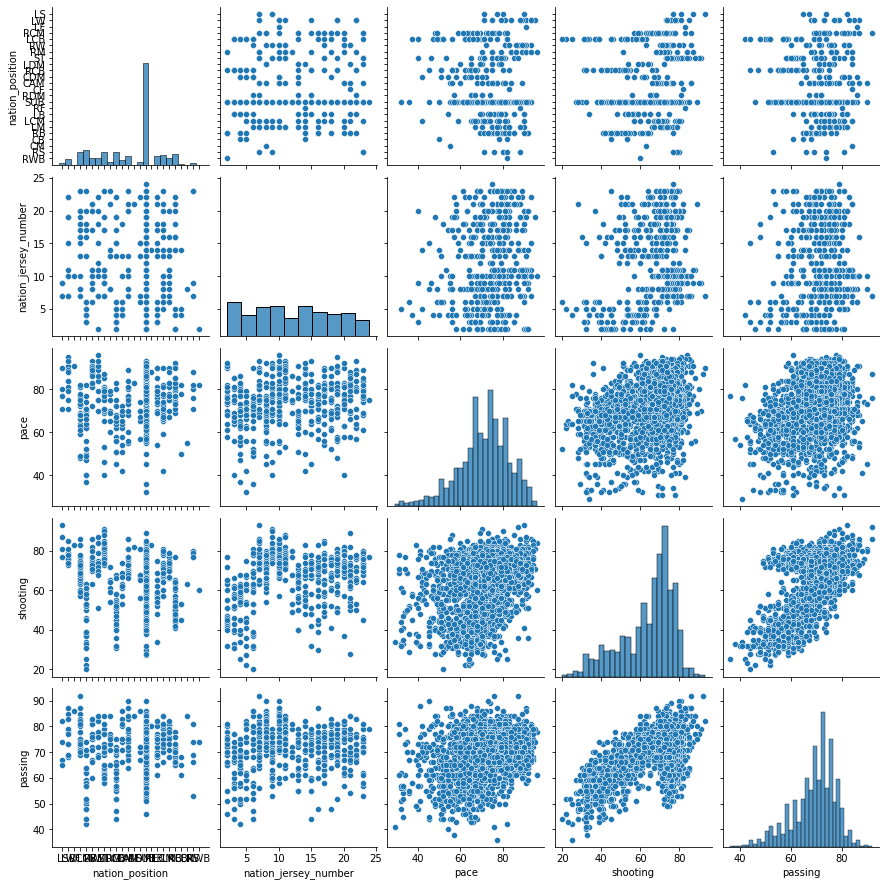

In [4]:
sea.pairplot(fifa_20_players.head(2000), vars = fifa_20_players.columns[29:34])
#sea.pairplot(fifa_20_players.head(1000))
plt.show()

In [5]:
# Return a list of number of players by Nationality
# unique, counts = np.unique(fifa_20_players.nationality, return_counts=True)
# dict(zip(unique, counts))

In [6]:
v4_nationalities = ["Slovakia", "Czech Republic", "Hungary", "Poland"]

v4_df = fifa_20_players[fifa_20_players['nationality'].isin(v4_nationalities)]

In [14]:
v4_df[v4_df['sofifa_id'].duplicated()]

,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [15]:
v4_df[v4_df['long_name']=="Ladislav Krejčí"]

,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
2540,201215,L. Krejčí,Ladislav Krejčí,26,178,70,Czech Republic,Bologna,74,74,...,65+2,62+2,62+2,62+2,65+2,62+2,54+2,54+2,54+2,62+2
6761,252064,L. Krejčí,Ladislav Krejčí,20,187,84,Czech Republic,Sparta Praha,68,77,...,64+2,66+2,66+2,66+2,64+2,64+2,67+2,67+2,67+2,64+2


In [16]:
# # sea.pairplot(v4_df, vars = v4_df.columns[73:], hue="preferred_foot")
# v4_df_ft = v4_df.replace({'preferred_foot': {"Left": 0, "Right": 1}})
# # v4_df_ft["preferred_foot"] = pd.to_numeric(v4_df_ft["preferred_foot"])
# v4_df_ft = v4_df_ft.dropna()
# sea.pairplot(v4_df_ft, vars = v4_df_ft.columns[38:67])
# # sea.pairplot(v4_df_ft, vars = v4_df_ft.columns[38:67])

In [17]:
fifa_20_players['diff'] = fifa_20_players.apply(lambda row: row.potential - row.overall, axis=1)

<AxesSubplot:>

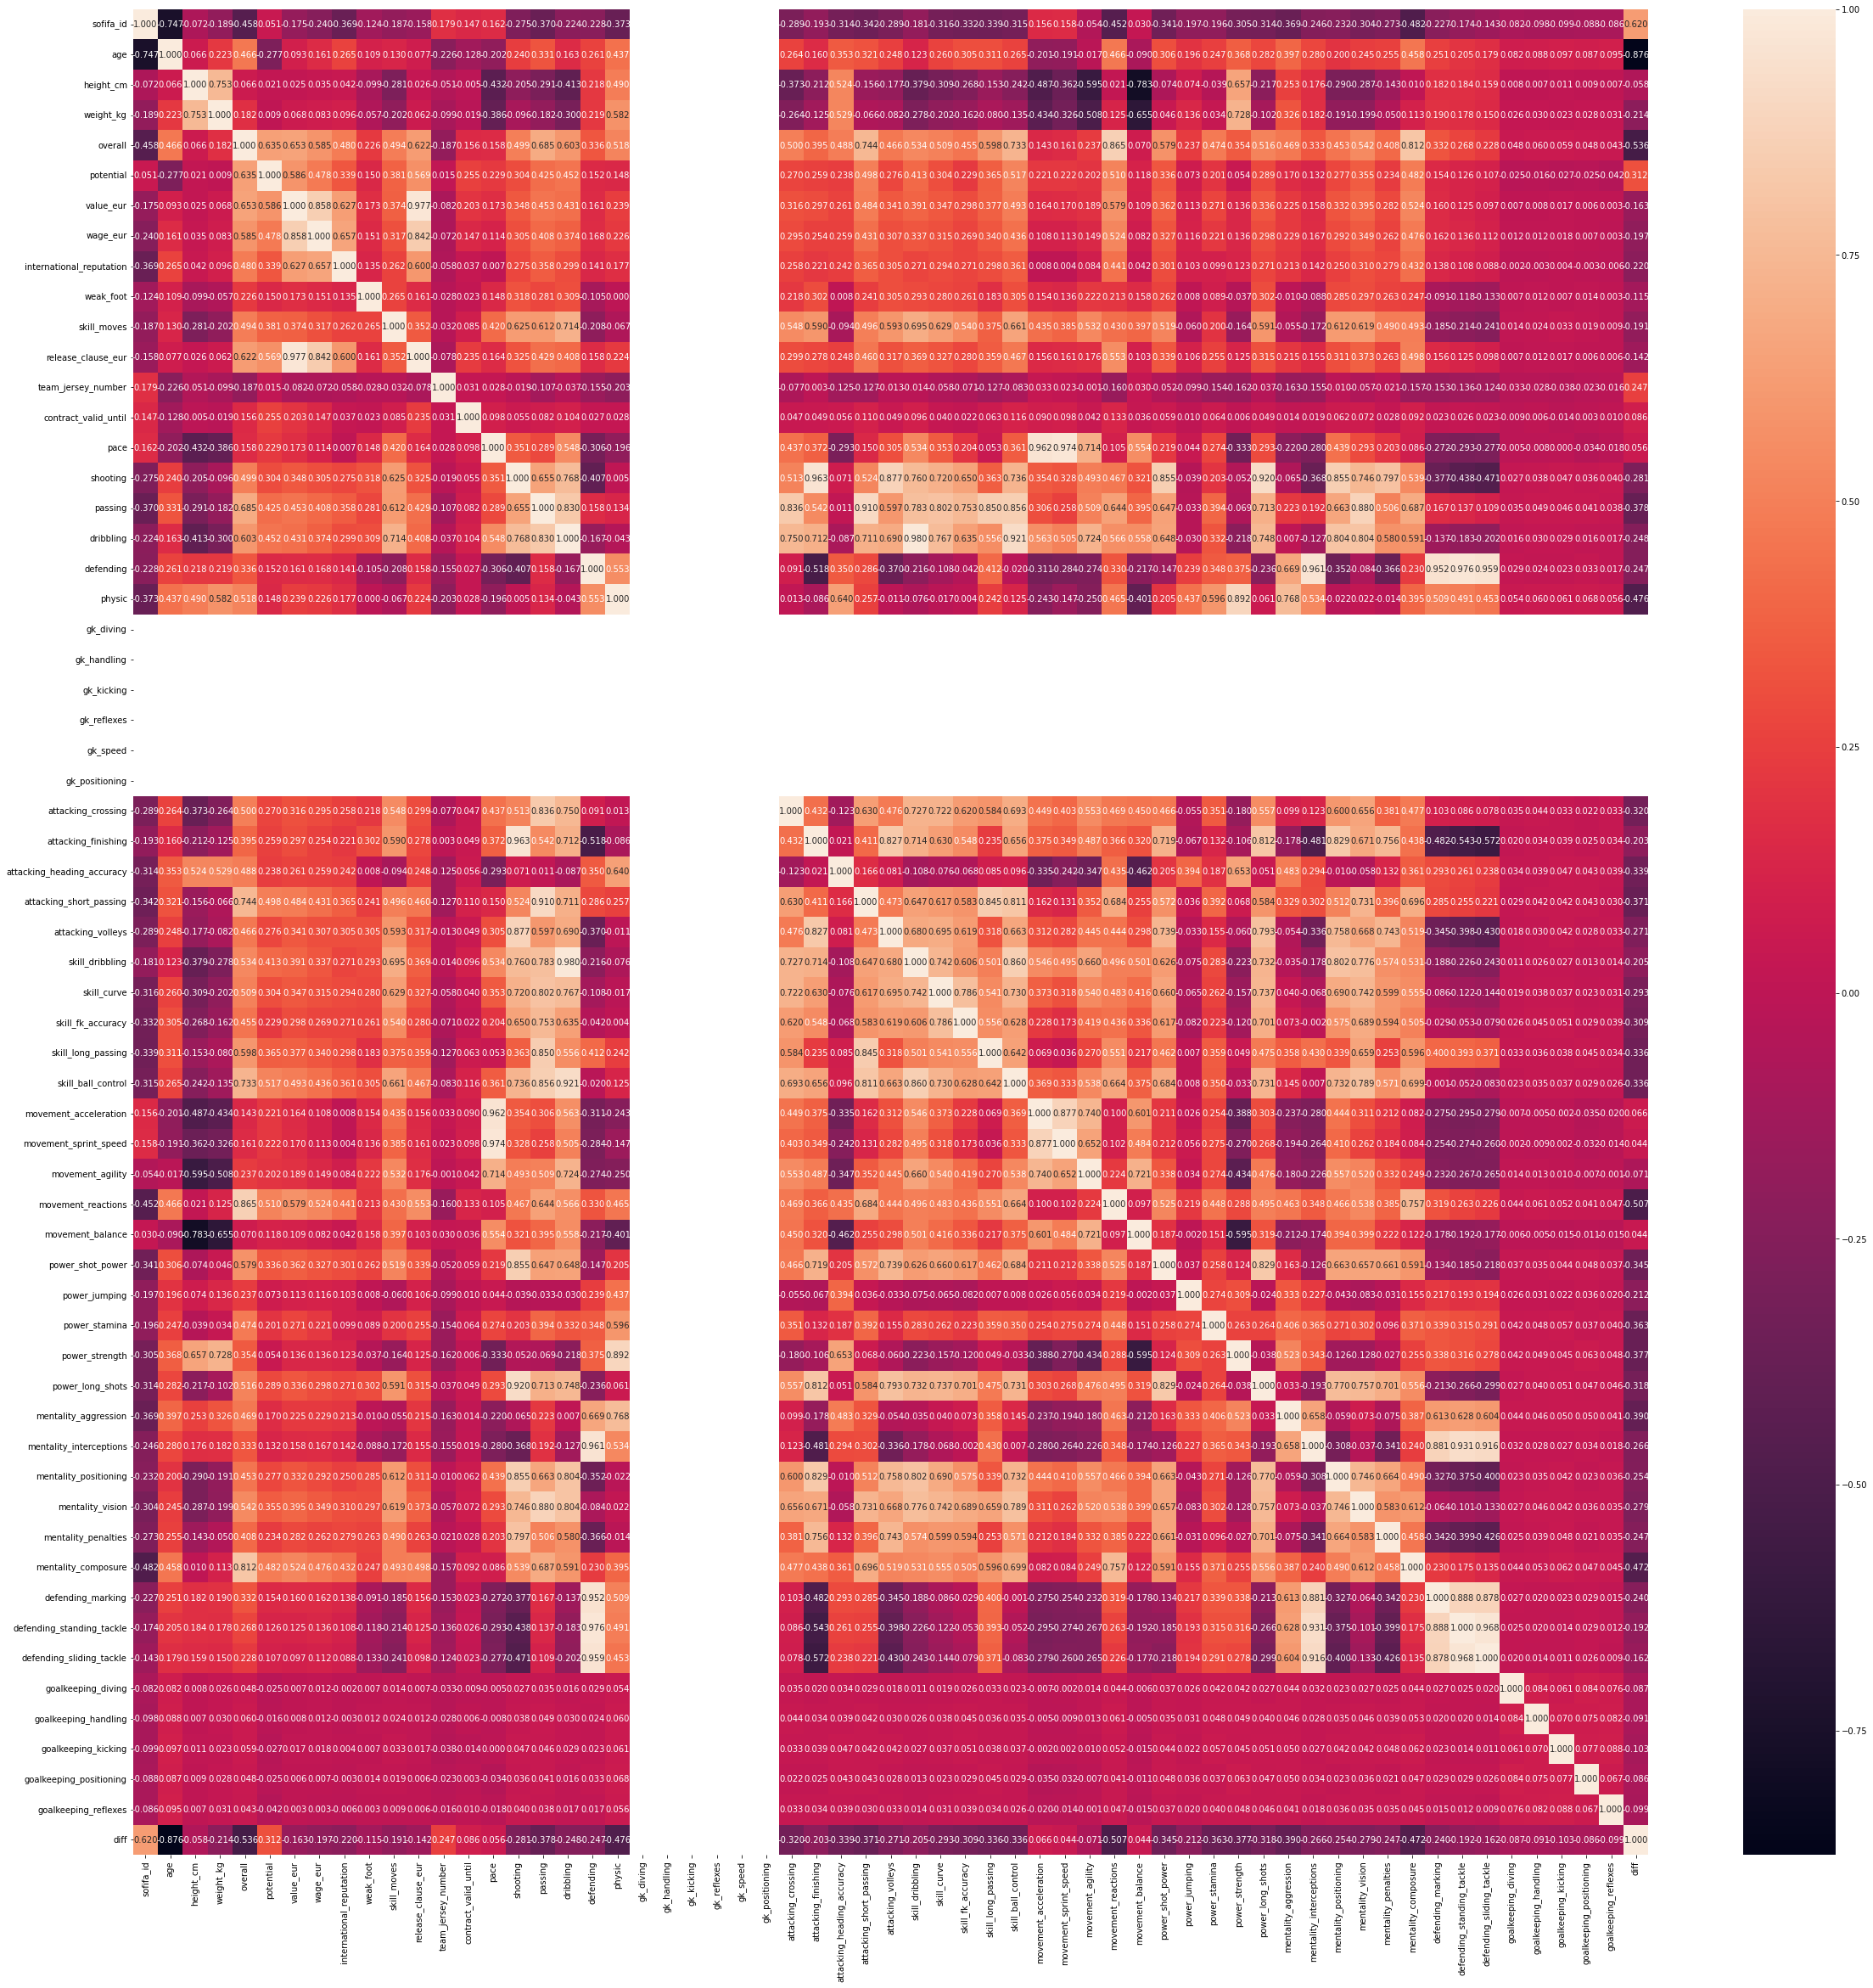

In [18]:
fig, ax = plt.subplots(figsize=(40,40))
sea.heatmap(fifa_20_players.corr(), ax=ax, annot=True, fmt=".3f")

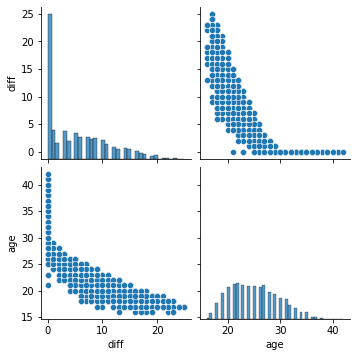

In [19]:
sea.pairplot(fifa_20_players, vars = ["diff", "age"])

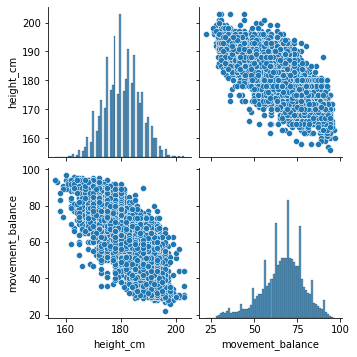

In [20]:
sea.pairplot(fifa_20_players, vars = ["height_cm", "movement_balance"])

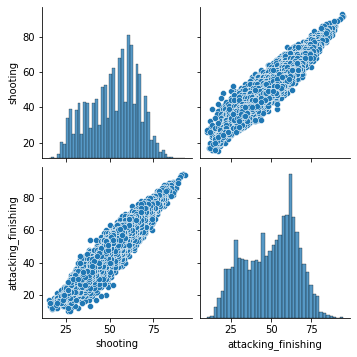

In [21]:
sea.pairplot(fifa_20_players, vars = ["shooting", "attacking_finishing"])

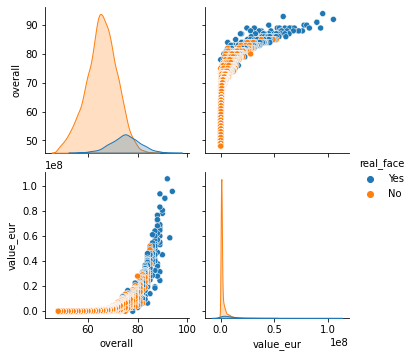

In [22]:
sea.pairplot(fifa_20_players, vars = ["overall", "value_eur"], hue="real_face")

# Linear regression (attacking_finishing & shooting)

During the data analysis phase, we have noticed a strong correlation between the "shooting" score and the "attacking_finishing" score. This, of course, makes sence, as usually better shooters are better at finishing attacks. In the following steps, we have decided to analyse the exact correlation between these two attributes and whether one could be calculated based on the other attribute.

First, we have plotted the "shooting" and "attacking_finishing" attributes, which proved that there seems to be a linear relationship between the two values.

Text(0, 0.5, 'Attacking finishing')

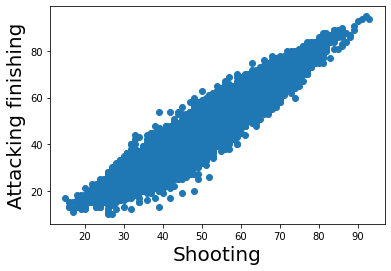

In [4]:
plt.scatter(fifa_20_players.shooting, fifa_20_players.attacking_finishing)
plt.xlabel("Shooting", fontsize=20)
plt.ylabel("Attacking finishing", fontsize=20)

Then we trained a Linear Regression model, which was provided by the "sklearn" library. We did this on a random sample of 1000 players.

In [5]:
fifa_20_players_train = fifa_20_players.sample(1000)
reg = linear_model.LinearRegression()
reg.fit(fifa_20_players_train[['shooting']], fifa_20_players_train.attacking_finishing)

LinearRegression()

In [6]:
reg.coef_

array([1.11713945])

In [7]:
reg.intercept_

-8.468082412598584

For the training data, the intercept equals -9.057987671649556 and the coeficient equals 1.12810844.

After calculating the parameters for the linear regression, we plotted it on the scatter plot graph.

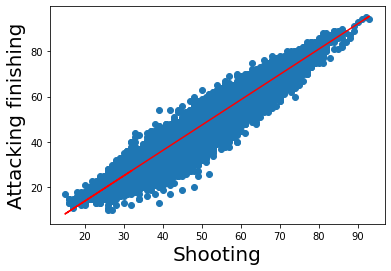

In [8]:
plt.scatter(fifa_20_players.shooting, fifa_20_players.attacking_finishing)
plt.xlabel("Shooting", fontsize=20)
plt.ylabel("Attacking finishing", fontsize=20)
plt.plot(fifa_20_players.shooting, reg.predict(fifa_20_players[['shooting']]), color="red")

In [9]:
# MAE
metrics.mean_absolute_error(fifa_20_players[['shooting']], fifa_20_players.attacking_finishing)

4.0668869218301955

In [10]:
# MSE
metrics.mean_squared_error(fifa_20_players[['shooting']], fifa_20_players.attacking_finishing)

28.18607405560404

In [11]:
# RMSE
np.sqrt(metrics.mean_squared_error(fifa_20_players[['shooting']], fifa_20_players.attacking_finishing))

5.309055853502017

In [12]:
# R2
reg.score(fifa_20_players[['shooting']], fifa_20_players.attacking_finishing)

0.9276164619407694

The R squared value for our trained model is 0.92, which is a pretty good result.